In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn import metrics

In [ ]:
# importing data
data = pd.read_csv('data.csv', header=0)
data.head()

In [ ]:
# drop unnamed:32 column
data.drop("Unnamed: 32",axis=1,inplace=True)
# drop id column 
data.drop("id",axis=1,inplace=True)

In [ ]:
data.head()

In [ ]:
# features according to their category
features_mean = list(data.columns[1:11])
features_se = list(data.columns[11:20])
features_worst = list(data.columns[21:31])

#features_mean
#features_se
#features_worst

In [ ]:
# converting diagnosis into binary
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

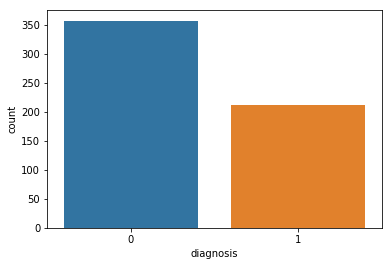

In [24]:
# exploring the freqeuncy of cancer stages
sns.countplot(data['diagnosis'],label="Count")

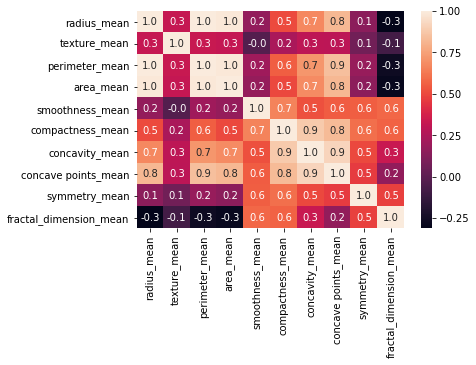

In [28]:
# data analysis & feature selection
corr = data[features_mean].corr()
sns.heatmap(corr,annot=True,fmt='.1f')

#### observations:
* the radius, parameter and area are hgihly correlated
* compactness_mean, concavity_mean and concavepoint_mean are highly correlated

In [30]:
# we use the above column names for prediction
prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

In [34]:
# spliting the data into train and test
train, test = train_test_split(data, test_size = 0.3)

print(train.shape)
print(test.shape)

train_X = train[prediction_var]
train_y = train.diagnosis
test_X  = test[prediction_var]
test_y  = test.diagnosis

(398, 31)
(171, 31)


In [36]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
prediction=model.predict(test_X)
score = metrics.accuracy_score(prediction,test_y)
print("Accuracy Score: {:.2f}".format(score))

Accuracy Score: 0.92


In [40]:
# SVM
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
score = metrics.accuracy_score(prediction,test_y)
print("Accuracy Score: {:.2f}".format(score))

Accuracy Score: 0.88


#### now lets check with all column names

In [64]:
prediction_var = features_mean # taking all features
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
score = metrics.accuracy_score(prediction,test_y)
print("Accuracy Score: {:.2f}".format(score))

Accuracy Score: 0.95


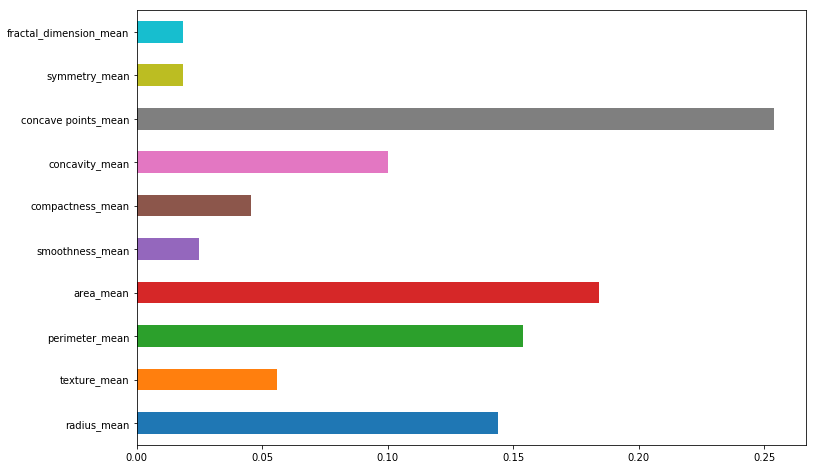

In [43]:
importances=pd.Series(model.feature_importances_, index=train_X.columns)
importances.plot(kind='barh', figsize=(12,8))

In [45]:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp) # this is the property of Random Forest classifier that it provide us the importance 

concave points_mean       0.254097
area_mean                 0.184073
perimeter_mean            0.154108
radius_mean               0.144157
concavity_mean            0.100221
texture_mean              0.056046
compactness_mean          0.045619
smoothness_mean           0.024823
fractal_dimension_mean    0.018533
symmetry_mean             0.018324
dtype: float64


In [46]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
score = metrics.accuracy_score(prediction,test_y)
print("Accuracy Score: {:.2f}".format(score))

Accuracy Score: 0.70


In [49]:
# based on above
prediction_var=['concave points_mean','perimeter_mean' , 'concavity_mean' , 'radius_mean','area_mean']      
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

In [52]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
score = metrics.accuracy_score(prediction,test_y)
print("Accuracy Score: {:.2f}".format(score))

Accuracy Score: 0.94


In [53]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
score = metrics.accuracy_score(prediction,test_y)
print("Accuracy Score: {:.2f}".format(score))

Accuracy Score: 0.71


In [65]:
# based on all features
prediction_var = data.columns
train_X= train[prediction_var]
train_y= train.diagnosis
test_X = test[prediction_var]
test_y = test.diagnosis

train_X.drop("diagnosis",axis=1,inplace=True)
test_X.drop("diagnosis",axis=1,inplace=True)

model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_y)
prediction = model.predict(test_X)
score = metrics.accuracy_score(prediction,test_y)
print("Accuracy Score: {:.2f}".format(score))

Accuracy Score: 0.96


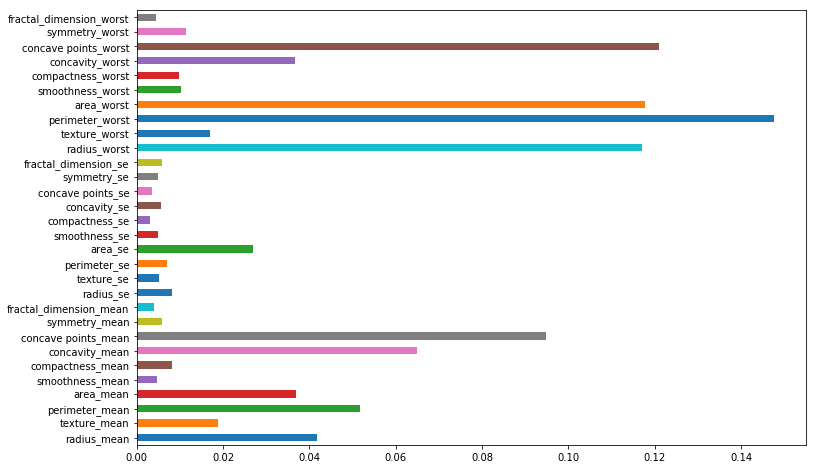

In [66]:
importances=pd.Series(model.feature_importances_, index=train_X.columns)
importances.plot(kind='barh', figsize=(12,8))